In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [14]:
file = "../build/main_cost_function.csv"
length_intrinsic,doping_acceptor,costinit = np.loadtxt(file, delimiter=',', unpack=True, skiprows=1)
# Make the costfunction always above 0
# costinit = costinit - np.min(costinit) + 1

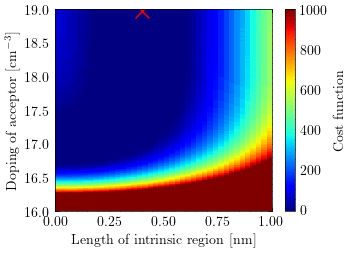

In [15]:
unique_length_intrinsic = np.unique(length_intrinsic)
unique_doping_acceptor = np.unique(doping_acceptor)

# Create a meshgrid
X, Y = np.meshgrid(unique_length_intrinsic, unique_doping_acceptor)

# Create a 2D array of the cost function
cost = costinit.reshape(len(unique_doping_acceptor), len(unique_length_intrinsic))
cost = cost.T

# Plot the heatmap
fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, cost, cmap='jet', vmin=-10, vmax=1000)
# imshow = ax.imshow(cost, extent=[X.min(), X.max(), Y.min(), Y.max()], aspect='auto', origin='lower', cmap='jet', interpolation="bicubic", vmax=1000)
# im = imshow
# Create colorbar
cbar = fig.colorbar(im, ax=ax)

# Set the labels
ax.set_xlabel('Length of intrinsic region [nm]')
ax.set_ylabel('Doping of acceptor [cm$^{-3}$]')
cbar.set_label('Cost function')

# Show the minima
minima = np.argmin(cost)
minima_x = unique_length_intrinsic[minima % len(unique_length_intrinsic)]
minima_y = unique_doping_acceptor[minima // len(unique_length_intrinsic)]
ax.scatter(minima_x, minima_y, marker='x', color='red', s=100, label='Minima')

# Save the figure
plt.savefig('paper_heatmap_cf.pdf', bbox_inches='tight')

In [9]:
NbLengthIntrinsic = len(unique_length_intrinsic)
NbDopingAcceptor = len(unique_doping_acceptor)

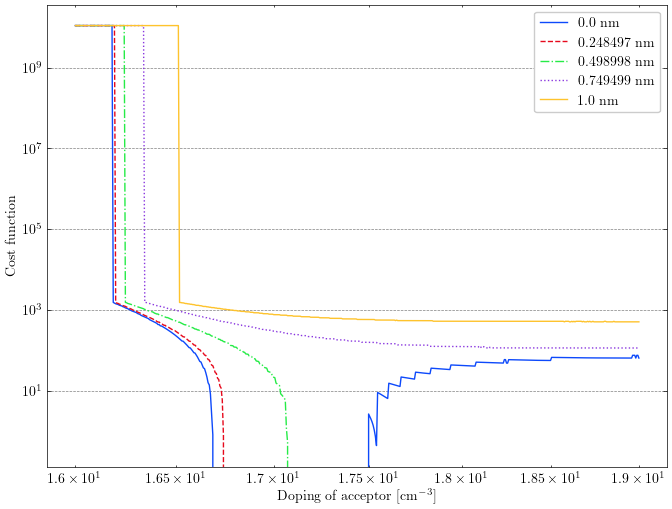

In [10]:
# Plot Cost function vs Doping of acceptor for different Length of intrinsic region
NbCurves = 5
fig, ax = plt.subplots(figsize=(8, 6))
index_length_intrinsic = np.linspace(0, NbLengthIntrinsic-1, NbCurves, dtype=int)
for i in index_length_intrinsic:
    ax.plot(unique_doping_acceptor, cost[:, i], label=f'{unique_length_intrinsic[i]} nm')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Doping of acceptor [cm$^{-3}$]')
ax.set_ylabel('Cost function')
ax.legend()

